In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.vision.gan import *
from fastai.callbacks import *
import matplotlib.animation as animation

In [3]:
path = Path('G:/Mars/image_patches/')

In [4]:
len(os.listdir(path))

664203

In [5]:
def get_data(bs, size):
    return (GANItemList.from_folder(path, noise_sz=100)
               .split_none()
               .label_from_func(noop)
               .transform(tfms=[[crop_pad(size=size, row_pct=(0,1), col_pct=(0,1))], []], size=size, tfm_y=True)
               .databunch(bs=bs, num_workers=4)
               .normalize(stats = [torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])], do_x=False, do_y=True))

In [6]:
data = get_data(64, 128)

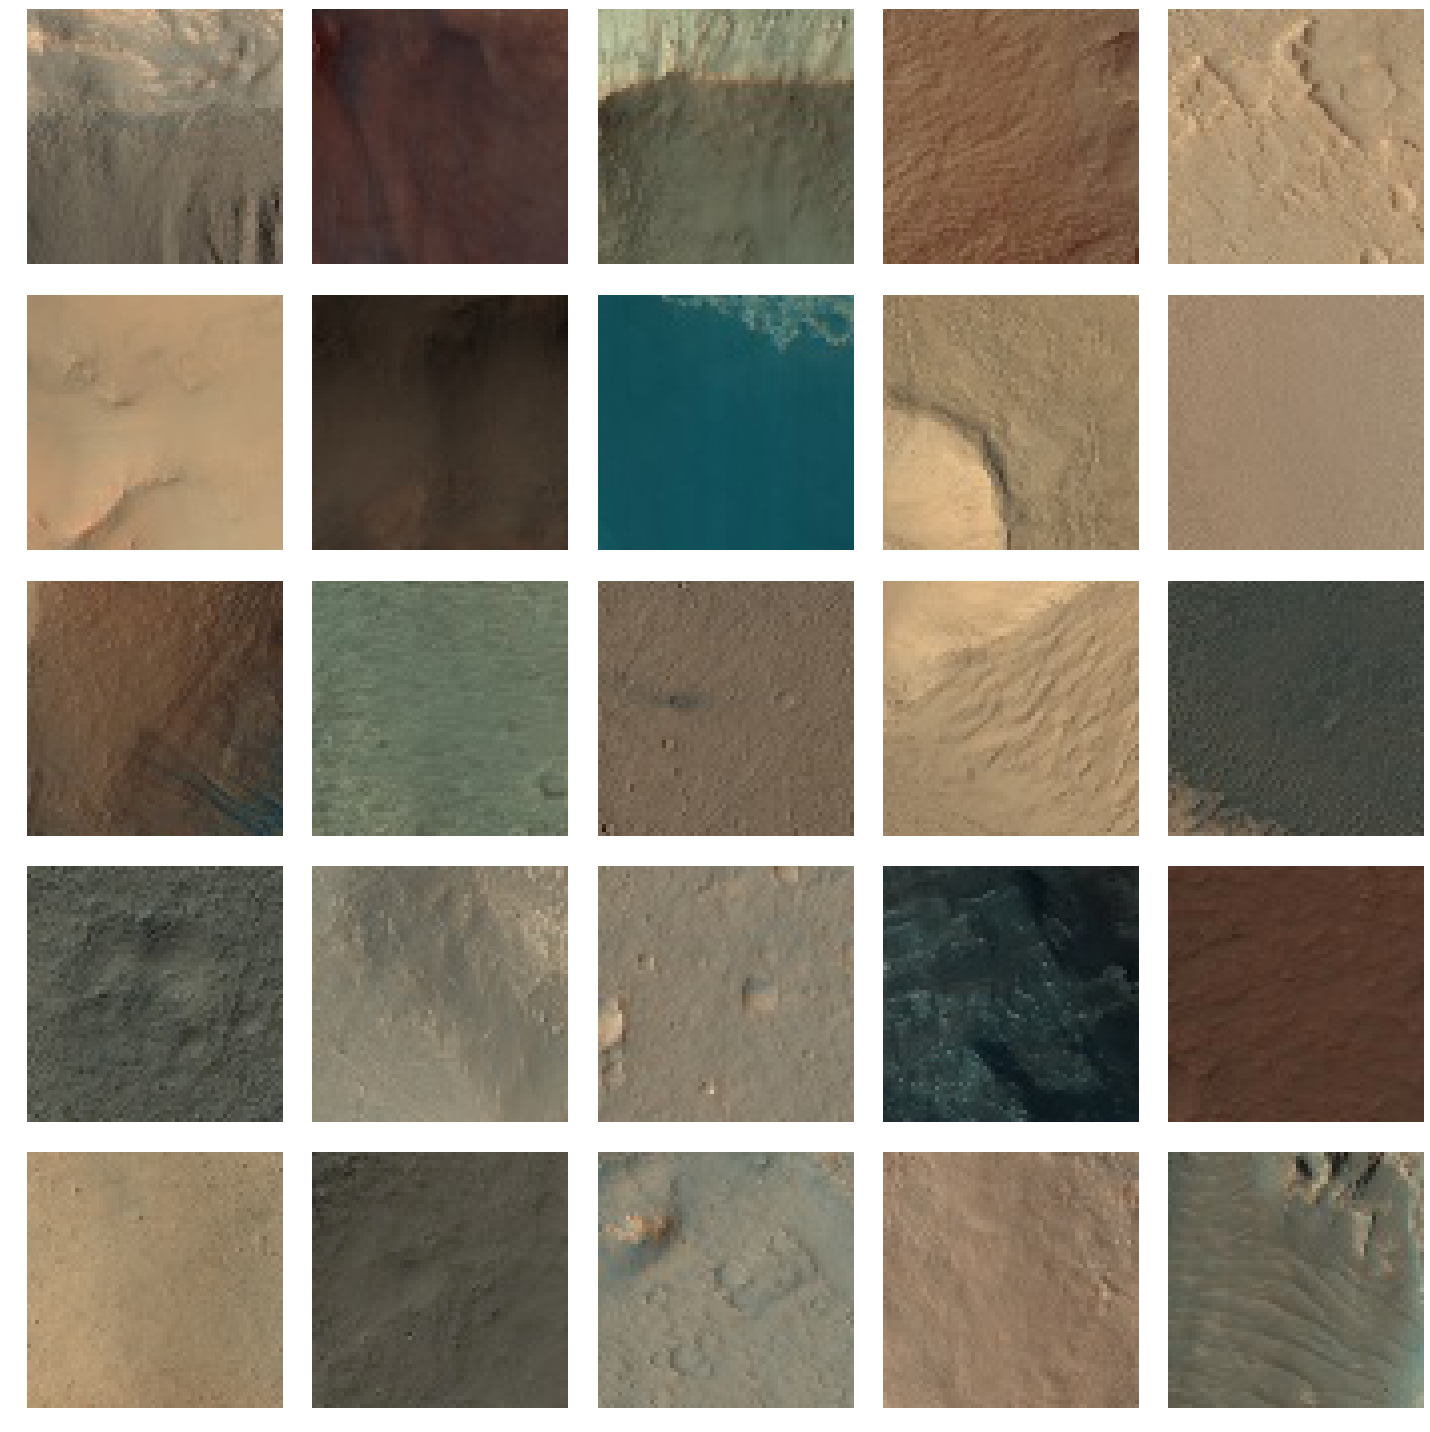

In [7]:
data.show_batch(rows=5)

In [7]:
generator = basic_generator(in_size=64, n_channels=3, n_extra_layers=1)
critic    = basic_critic   (in_size=64, n_channels=3, n_extra_layers=1)

In [8]:
# learn = GANLearner.wgan(data, generator, critic, switch_eval=False, 
#                         switcher = partial(FixedGANSwitcher, n_crit=10, n_gen=2),
#                         opt_func = partial(optim.Adam, betas = (0.,0.99)), wd=0.)
learn = GANLearner.wgan(data, generator, critic, switch_eval=False,
                        opt_func = partial(optim.Adam, betas = (0.,0.99)), wd=0.)

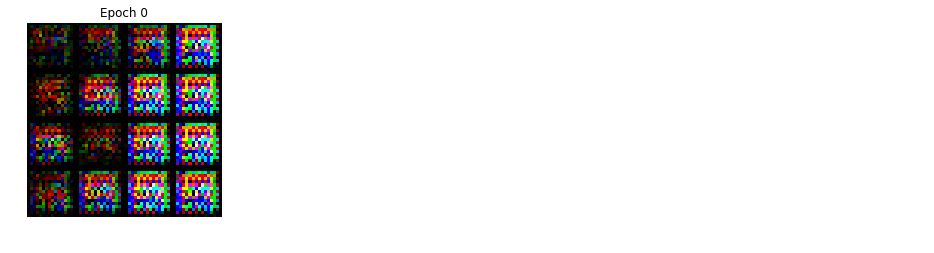

In [10]:
learn.fit(1, 2e-4)

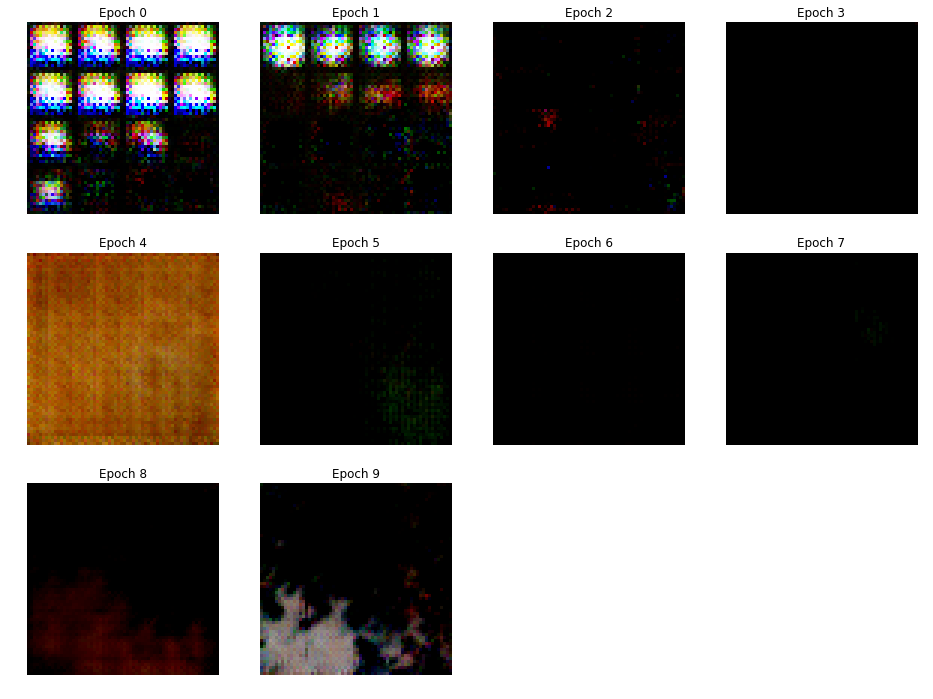

In [11]:
learn.fit(10, 2e-4)

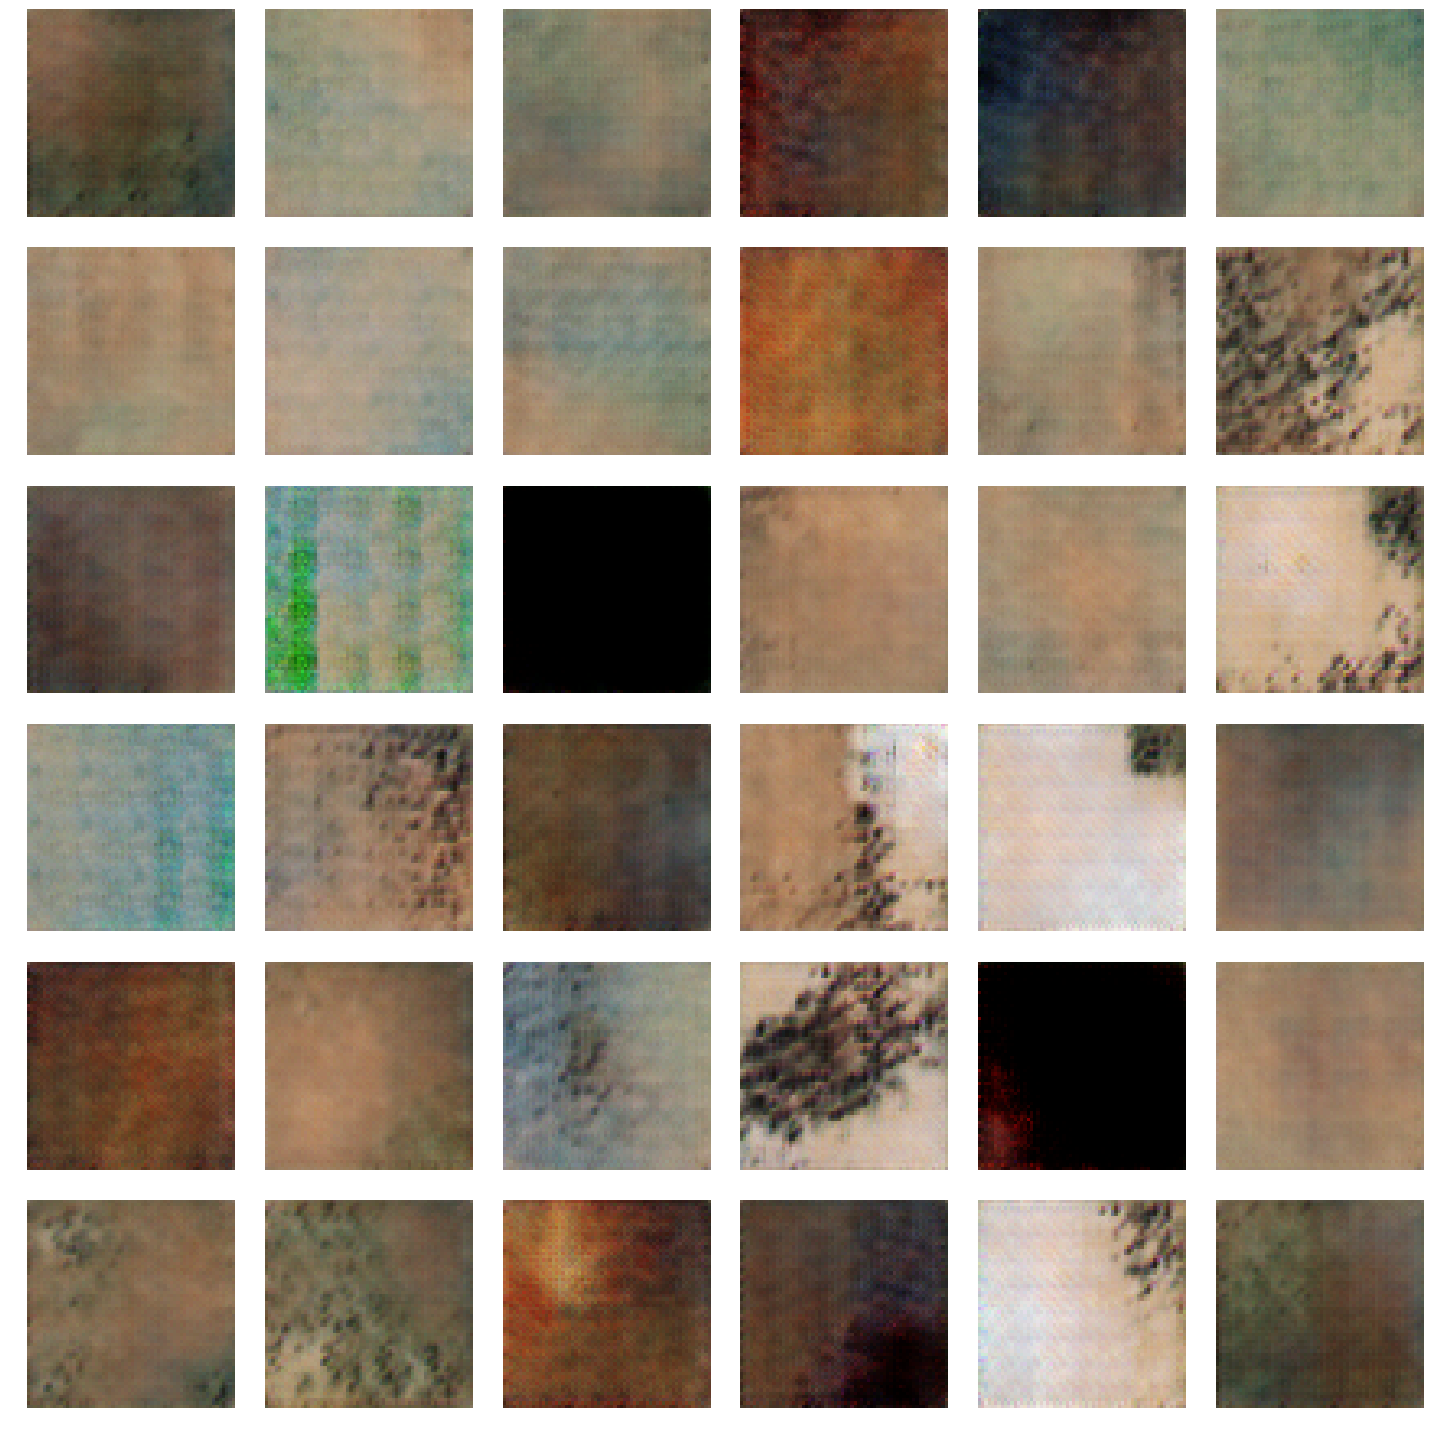

In [12]:
learn.gan_trainer.switch(gen_mode=True)
learn.show_results(ds_type=DatasetType.Train, rows=6, figsize=(20,20))

In [13]:
learn.save('mars1')

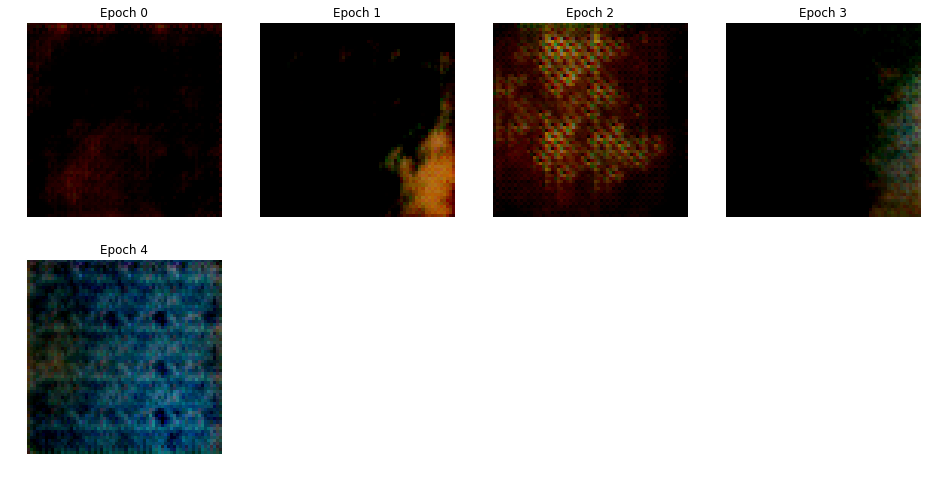

In [14]:
learn.fit(5, 2e-4)

In [15]:
learn.save('mars2')

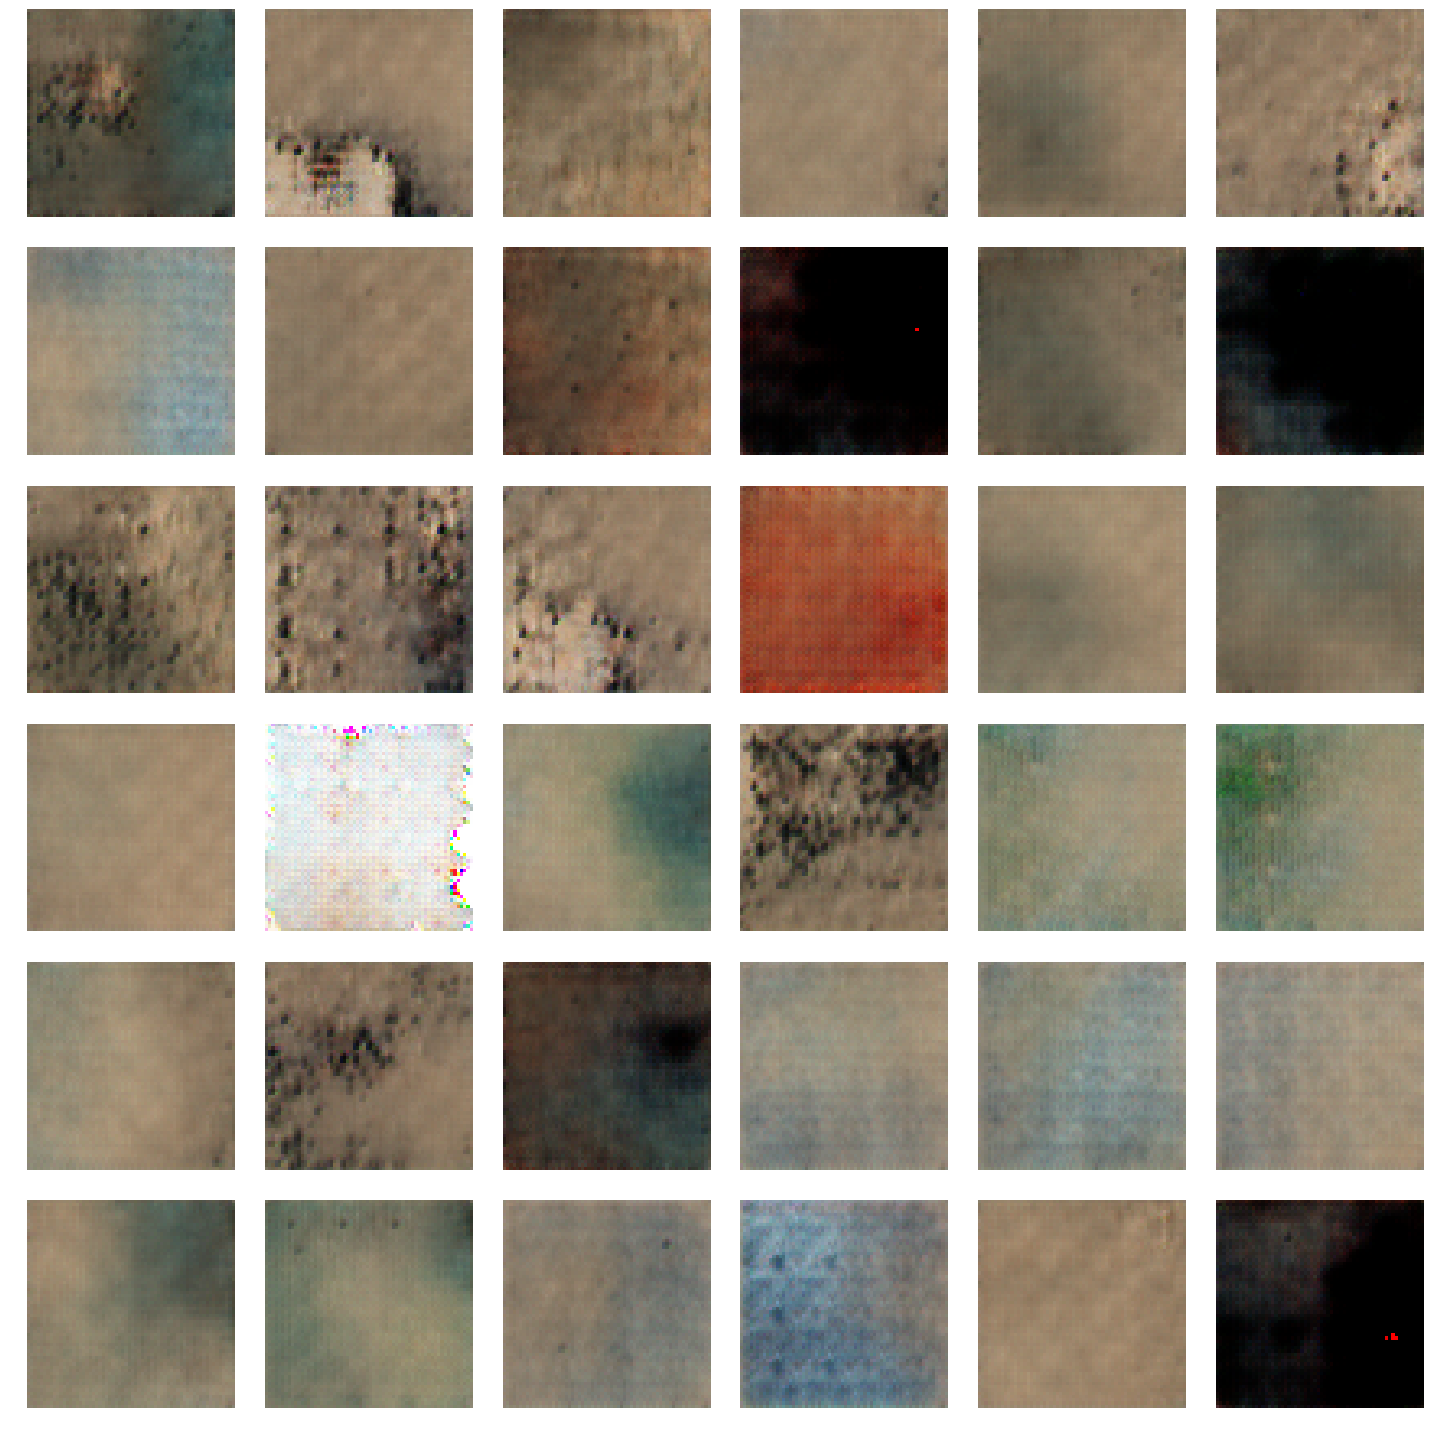

In [16]:
learn.gan_trainer.switch(gen_mode=True)
learn.show_results(ds_type=DatasetType.Train, rows=6, figsize=(20,20))

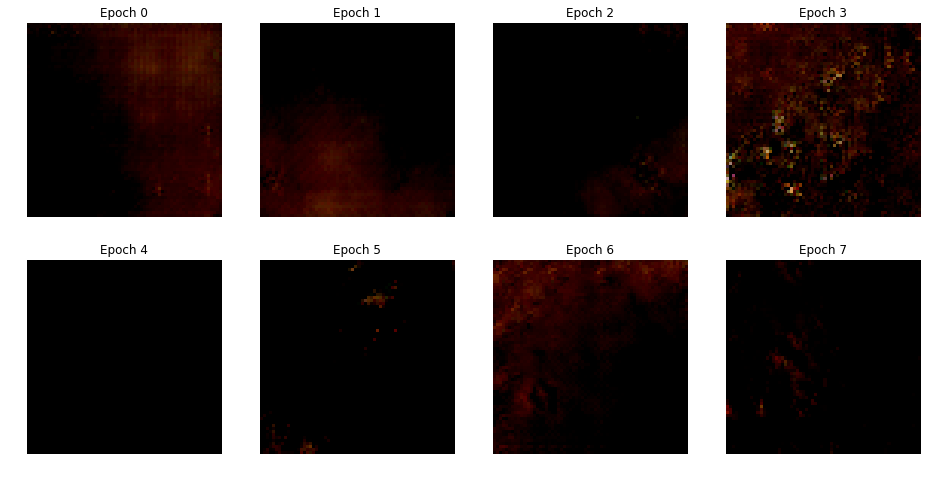

In [17]:
learn.fit(8, 2e-4)

In [18]:
learn.save('mars3')

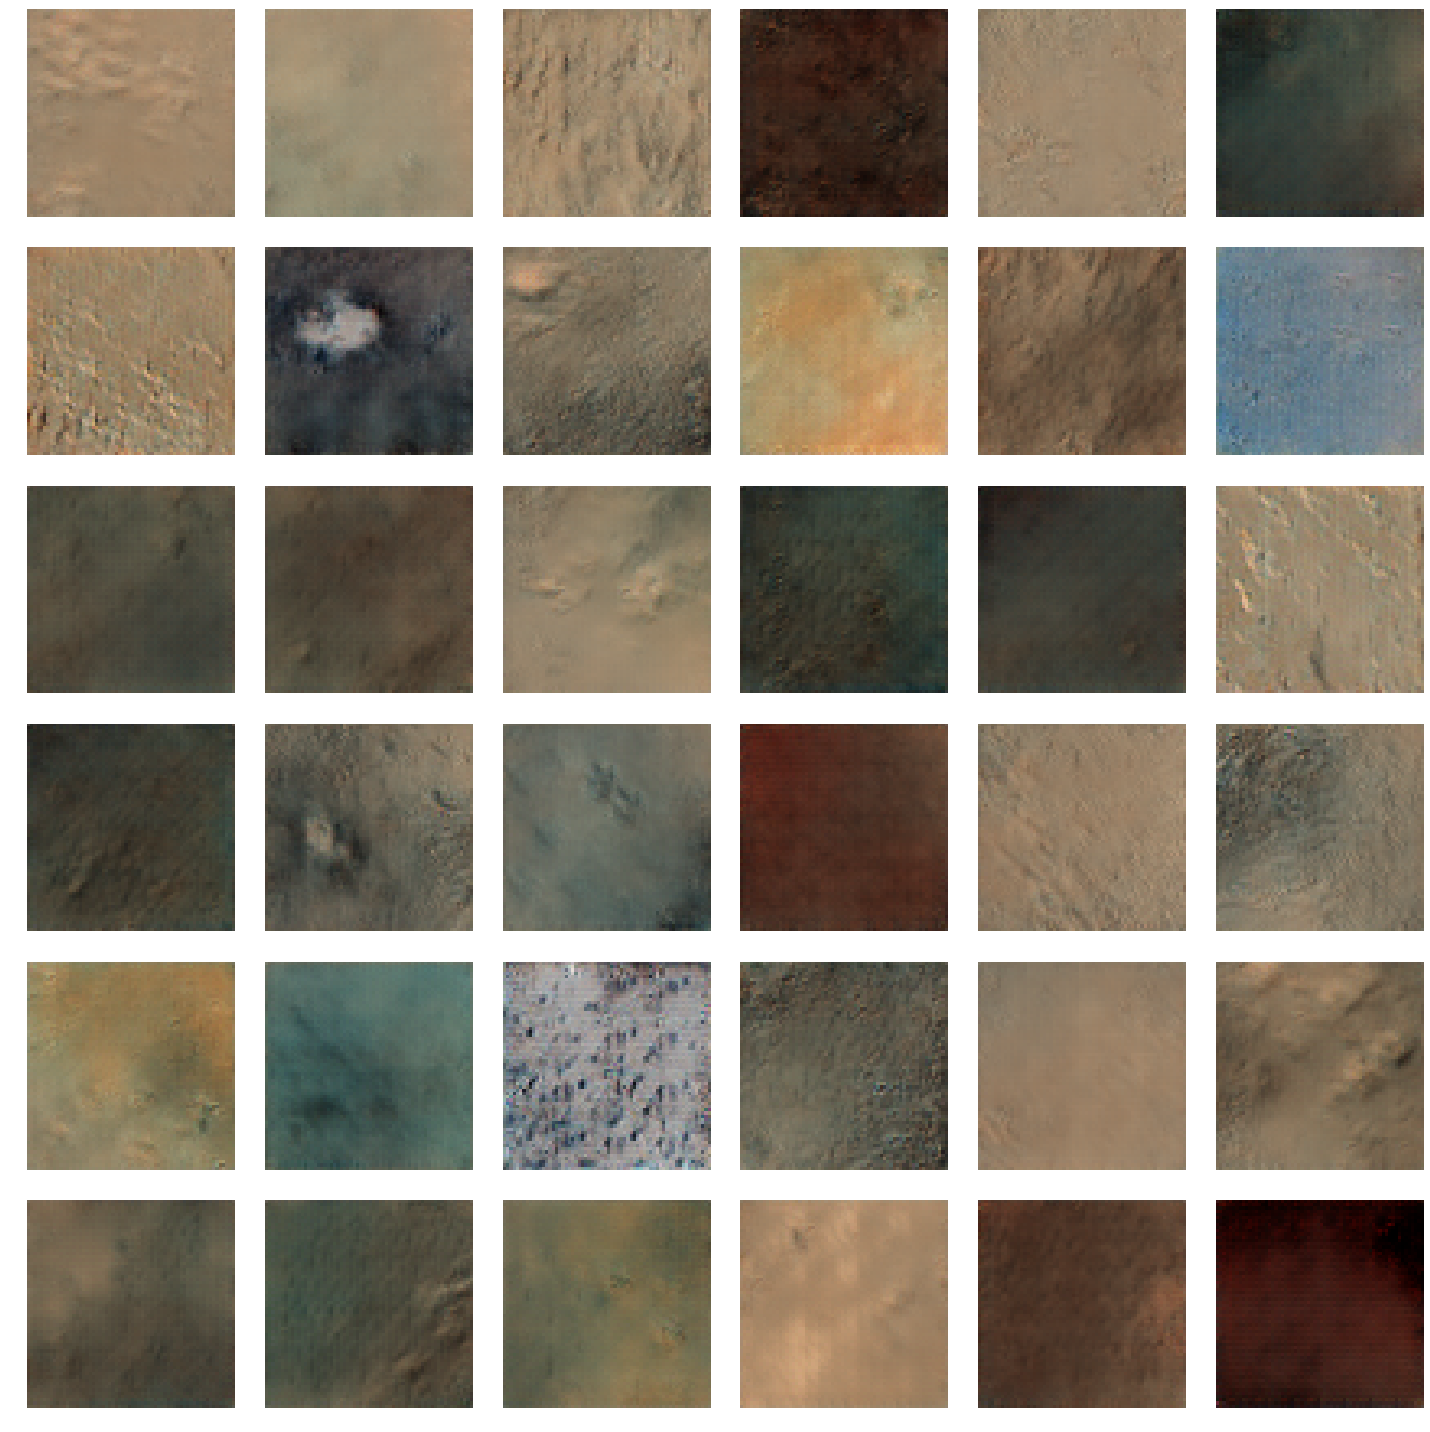

In [19]:
learn.gan_trainer.switch(gen_mode=True)
learn.show_results(ds_type=DatasetType.Train, rows=6, figsize=(20,20))

In [9]:
learn.load('mars3', purge=False);

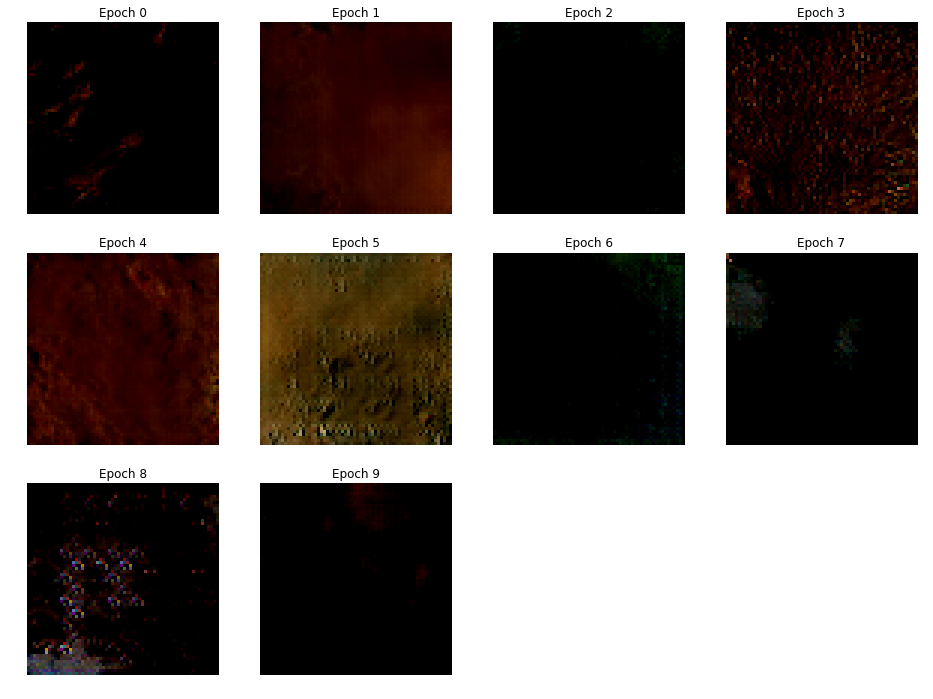

In [11]:
learn.fit(10, 2e-4)

In [12]:
learn.save('mars4')

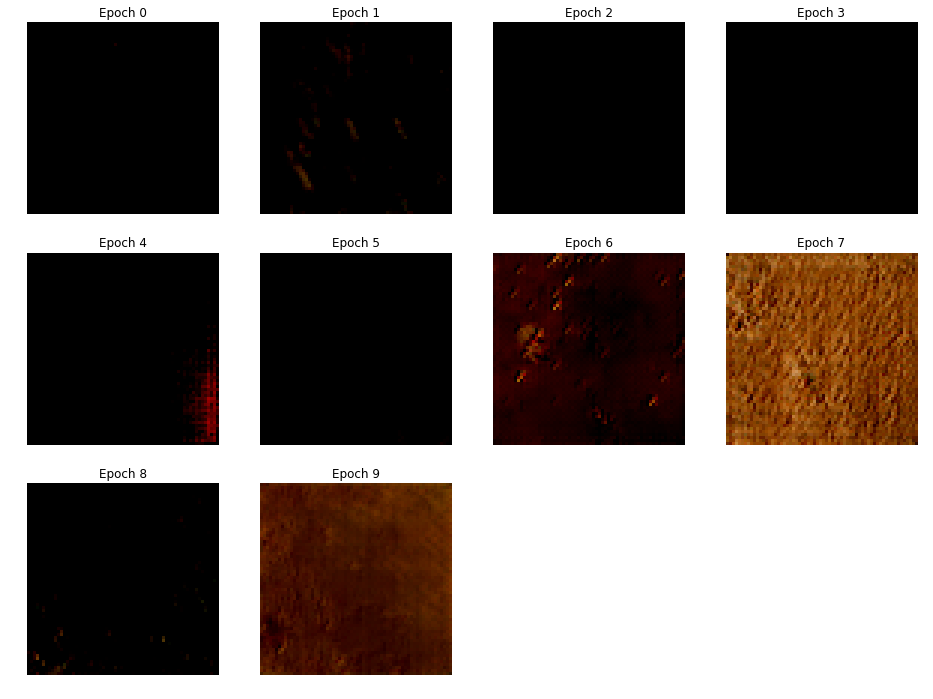

In [13]:
learn.fit(10, 2e-4)

In [14]:
learn.save('mars5')

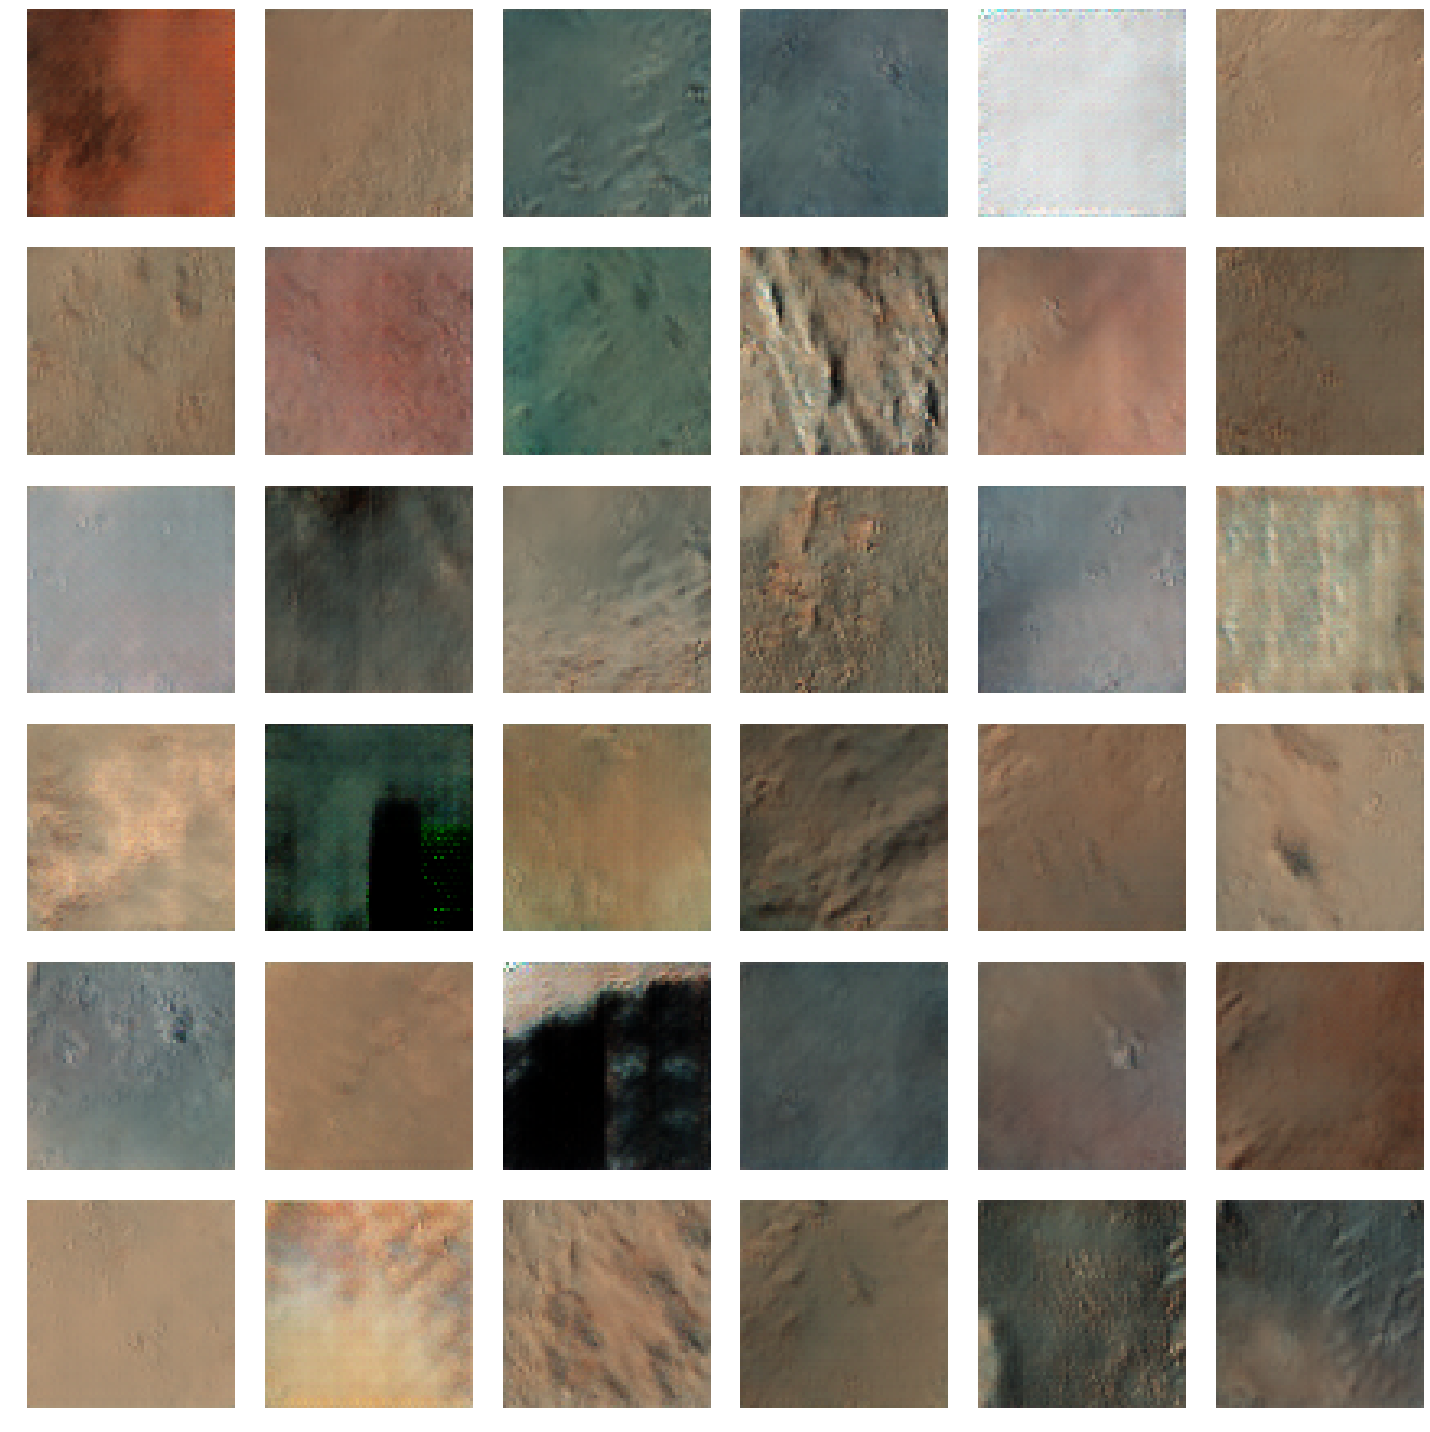

In [15]:
learn.gan_trainer.switch(gen_mode=True)
learn.show_results(ds_type=DatasetType.Train, rows=6, figsize=(20,20))

In [9]:
learn.load('mars5', purge=False);